In [1]:
import numpy as np
import pandas as pd
#import sklearn as sk
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#import random
#from functools import partial
import glob

In [2]:
filenames = glob.glob('Kansas\\*.csv') # Grabs all the filnames
county_names = [f.split('_')[2] for f in filenames] # this line will grab the county name as the third item of the file name list
                                                    # Note that this may be different for different states and should be checked!
data = np.array(list(zip(filenames, county_names))) # this line combines the name of the csvs with their respective county
df = pd.DataFrame(data, columns = ['filename', 'county']) # convert array -> pandas DataFrame (maybe will use SQL later?)
df.set_index('county', inplace = True) 
df.sort_index(ascending = True, inplace = True) # sort dataframe alphabetically by county
counties_unique = df.index.unique()

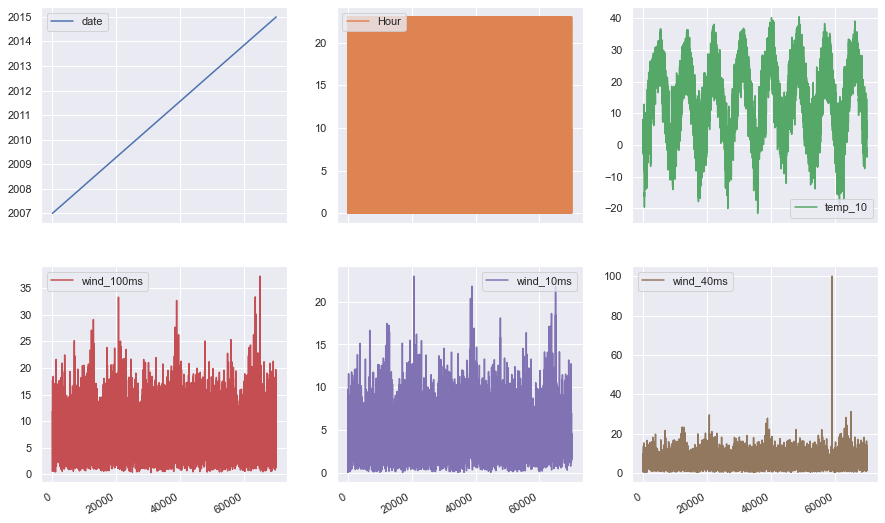

In [3]:
i = 0
name_i = df.loc[df.index == counties_unique[i], 'filename'].values[0] # grabbing the filename for the ith county
new_data = pd.read_csv(name_i, parse_dates= {"date" : ["Year","Month","Day"]})
if new_data.columns[1] == "Unnamed: 0":
    new_data.drop(new_data.columns[1], axis = 1, inplace = True)
new_data.plot(subplots = True, layout = (3, 3), figsize = (15, 15)); # plotting all the columns

In [4]:
# Assessing quality of the data
print(new_data.info()) # checking for null values
print(np.std(new_data.groupby('date').Hour.mean())) # checking the consistency in hourly values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        70080 non-null  datetime64[ns]
 1   Hour        70080 non-null  int64         
 2   temp_10     70080 non-null  float64       
 3   wind_100ms  70080 non-null  float64       
 4   wind_10ms   70080 non-null  float64       
 5   wind_40ms   70080 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 3.2 MB
None
0.0


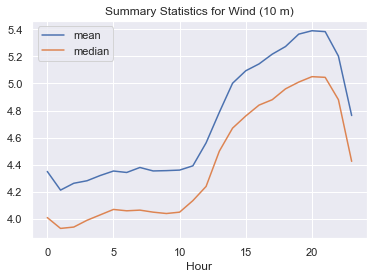

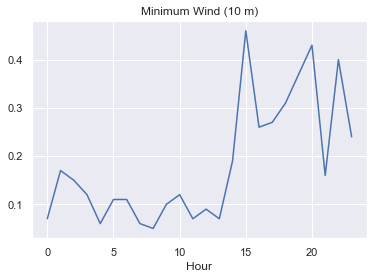

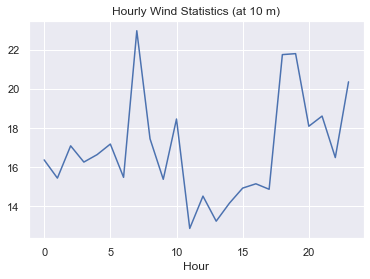

In [5]:
hourly_values = new_data.groupby('Hour').wind_10ms.mean()
hourly_values.plot(label = 'mean')
hourly_values = new_data.groupby('Hour').wind_10ms.median()
hourly_values.plot(label = 'median', title = "Summary Statistics for Wind (10 m)")
plt.legend()
plt.show()

hourly_values = new_data.groupby('Hour').wind_10ms.min()
hourly_values.plot(label = 'min', title = "Minimum Wind (10 m)")
plt.show()

hourly_values = new_data.groupby('Hour').wind_10ms.max()
hourly_values.plot(label = 'max', title = "Maximum Wind (10 m)")
plt.title("Hourly Wind Statistics (at 10 m)")
plt.show()